In [32]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [33]:
data = pd.read_csv(os.path.join('data', 'data.csv'))
data

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,3,13,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5816,3,13,1,3,4,4,4,4,4,4,...,5,5,5,5,4,5,5,5,5,5
5817,3,13,1,0,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
5818,3,13,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [34]:
data = data[['difficulty'] + ['Q' + str(i) for i in range(1, 29)]]
data

,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,4,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,4,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5816,4,4,4,4,4,4,4,4,4,4,...,5,5,5,5,4,5,5,5,5,5
5817,4,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
5818,2,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [35]:
pca = PCA(n_components=0.95)
data_pca = pca.fit_transform(data)
data_pca.shape

(5820, 13)

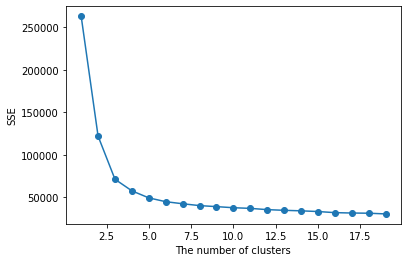

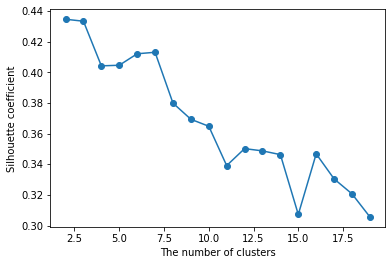

In [36]:
# 记录不同类数的轮廓系数结果
x_label_silhouette_score = []
y_label_silhouette_score = []
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


model = KMeans(n_clusters=1, init='random', n_init=10).fit(data_pca)
# clusterid, error, nfound = kcluster(X, 1, dist='e', method='a', transpose=0)
x_label_SSE = [1]
y_label_SSE = [model.inertia_]
for n_clusters in range(2, 10):
    # 采用基于余弦相似度的聚类
    
    model = KMeans(n_clusters=n_clusters, init='random', n_init=10).fit(data_pca)
    # 计算轮廓系数
    silhouette_avg = silhouette_score(data_pca, model.labels_, metric='euclidean')
    x_label_silhouette_score.append(n_clusters)
    y_label_silhouette_score.append(silhouette_avg)
    x_label_SSE.append(n_clusters)
    y_label_SSE.append(model.inertia_)
    
import matplotlib.pyplot as plt
plt.plot(x_label_SSE, y_label_SSE, marker="o")
plt.xlabel("The number of clusters")
plt.ylabel("SSE")
plt.show()
plt.plot(x_label_silhouette_score, y_label_silhouette_score, marker="o")
plt.xlabel("The number of clusters")
plt.ylabel("Silhouette coefficient")
plt.show()

In [37]:
model = KMeans(n_clusters=3, init='random', n_init=10).fit(data)
#y_km中保存了聚类的结果
dict={}
for key in model.labels_:
    dict[key]=dict.get(key,0)+1
print(dict)

{1: 2363, 0: 2223, 2: 1234}


In [28]:
print(model.labels_)

[0 0 2 ... 2 1 1]


# TSNE可视化
## PCA初始化
### 二维

In [39]:
tsne_2=TSNE(n_components=2, metric='euclidean', init='pca')
X_tsne_2d = tsne_2.fit_transform(data_pca)

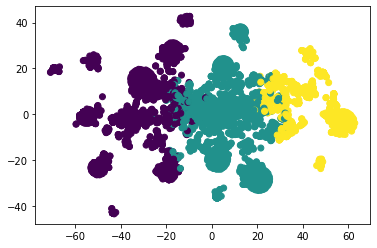

In [40]:
plt.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], c=model.labels_)
plt.show()

### 三维

In [114]:
tsne_3=TSNE(n_components=3, metric='euclidean', init='pca')
X_tnse_3d = tsne_3.fit_transform(data_Q)

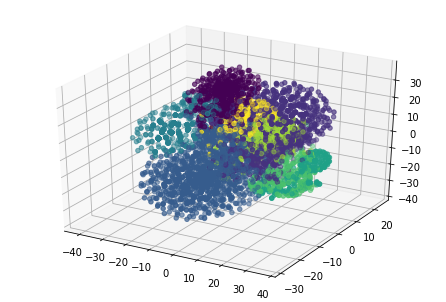

In [122]:
fig = plt.figure()
ax = Axes3D(fig)
t = ax.scatter(X_tnse_3d[:, 0] * -1, X_tnse_3d[:, 2], X_tnse_3d[:, 1], c=model.labels_)

plt.show()

## 随机（random）初始化
### 二维

In [43]:
tsne_2_rdm=TSNE(n_components=2, metric='euclidean', init='random')
X_tnse_2d_rdm = tsne_2_rdm.fit_transform(data_Q)

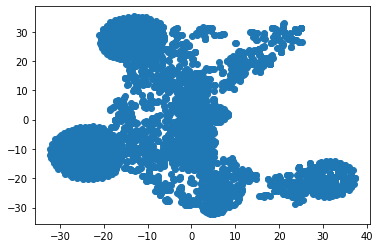

In [47]:
plt.scatter(X_tnse_2d_rdm[:, 1], X_tnse_2d_rdm[:, 0] * -1)
plt.show()

### 三维

In [48]:
tsne_3_rdm=TSNE(n_components=3, metric='euclidean', init='random')
X_tnse_3d_rdm = tsne_3_rdm.fit_transform(data_Q)

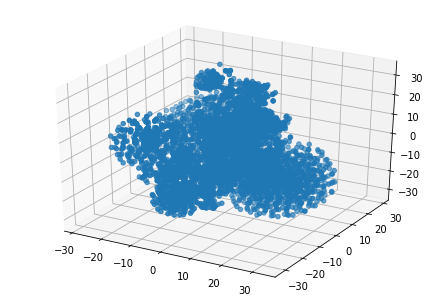

In [59]:
fig = plt.figure()
ax = Axes3D(fig)
t = ax.scatter(X_tnse_3d_rdm[:, 0], X_tnse_3d_rdm[:, 2], X_tnse_3d_rdm[:, 1])

plt.show()

In [61]:
set(list(data['nb.repeat']))

{1, 2, 3}